In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Data Collection and Analysis

In [ ]:
big_mart_data=pd.read_csv("/content/Train.csv")


In [ ]:
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
#number of data points and features
big_mart_data.shape

(8523, 12)

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:(12-7/5)
-Item_Identifier
-Item_Fat_Content
-Item_Type
-Outlet_Identifier
-Outlet_Size
-Outlet_Location_Type
-Outlet_Type

In [ ]:
#checking for missin values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing values
Mean-->Average value (Numerical)
Mode-->Most Repeated Value(Categorical)


In [ ]:
#mean value of Item_Weight column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
#filling the missing values in item_weight column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean,inplace=True)

In [ ]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outle_Size' with mode


In [ ]:
mode_of_outlet_size=big_mart_data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode([0])))

In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart_data.loc[missing_values,'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [ ]:
big_mart_data['Item_Outlet_Sales'] = big_mart_data['Item_Outlet_Sales'].replace(0, np.NaN)
big_mart_data['Item_Outlet_Sales'].fillna(big_mart_data['Item_Outlet_Sales'].mode()[0], inplace=True)

In [ ]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA ANALYSIS

In [ ]:
#statistical measures about the data
big_mart_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


#numerical features

In [ ]:
sns.set()

<ipython-input-615-a446425a54b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


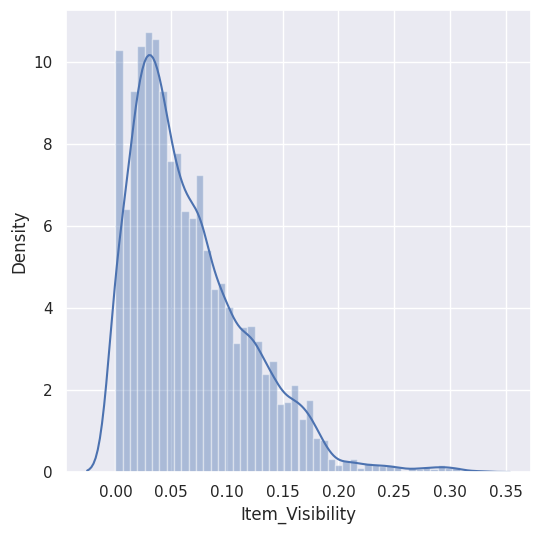

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-616-4c617a5bb08c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


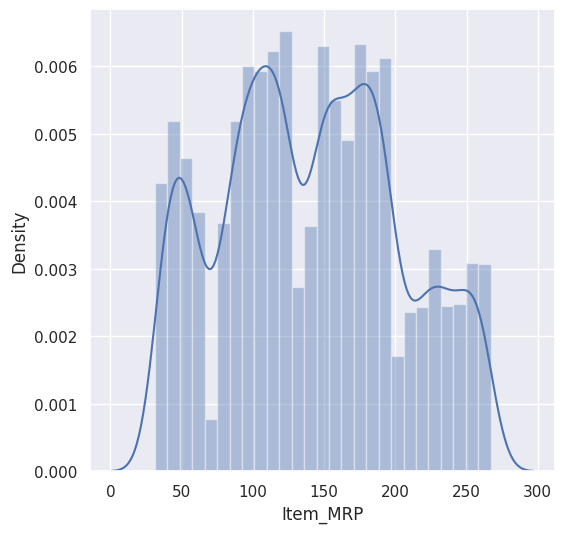

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-617-c5fa908b62ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


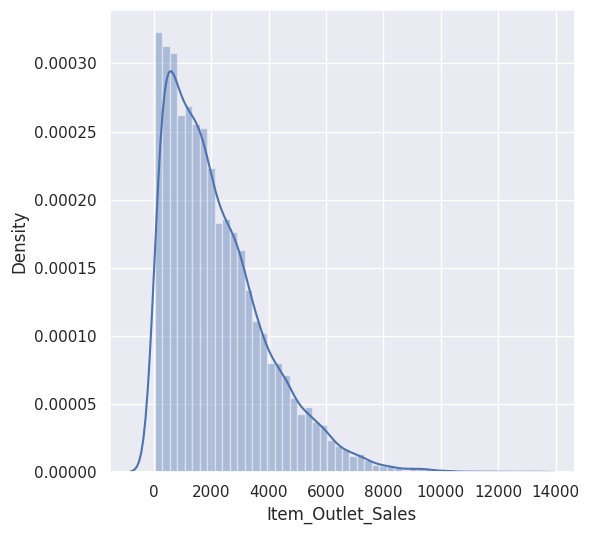

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

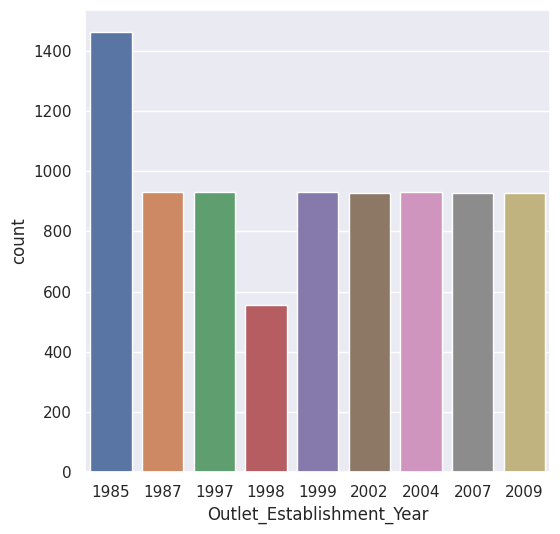

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

CATEGORICAL FEATURES

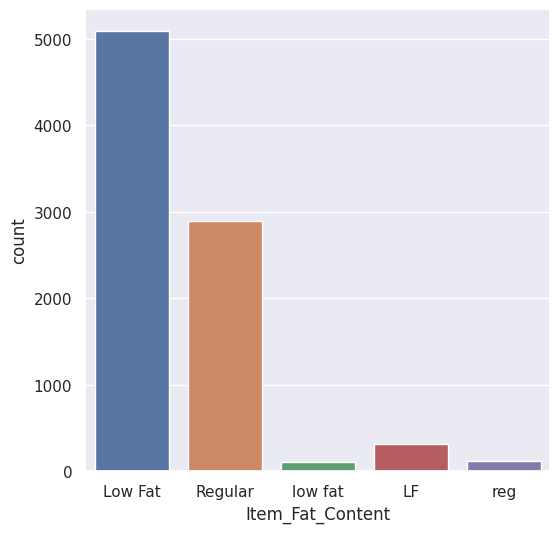

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

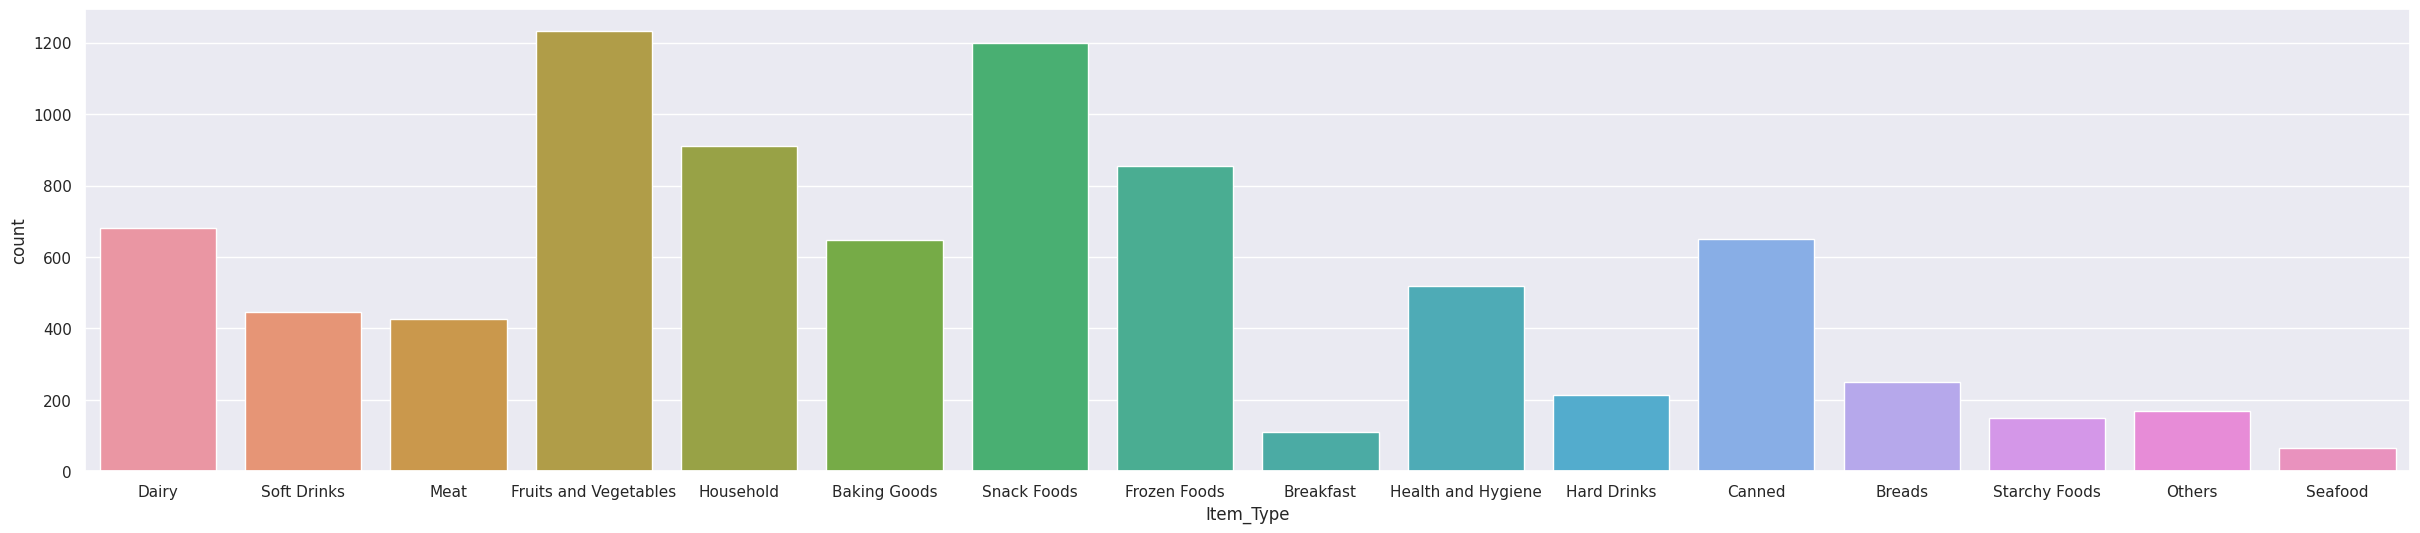

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

<ipython-input-621-5c520363ab76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=big_mart_data.corr(), annot=True, cmap='Blues')


<Axes: >

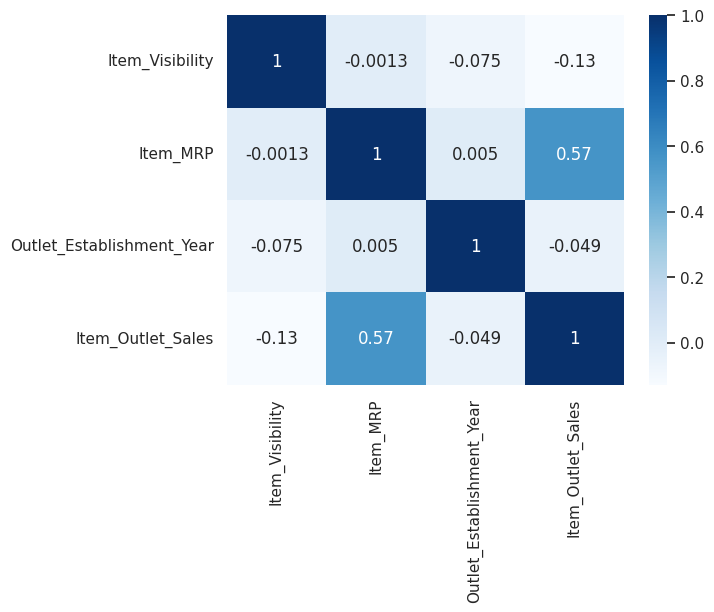

In [ ]:
sns.heatmap(data=big_mart_data.corr(), annot=True, cmap='Blues')

In [ ]:
big_mart_data.loc[big_mart_data['Item_Fat_Content']=='LF', 'Item_Fat_Content'] = 'Low Fat'
big_mart_data.loc[big_mart_data['Item_Fat_Content']=='low fat', 'Item_Fat_Content'] = 'Low Fat'
big_mart_data.loc[big_mart_data['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'Regular'

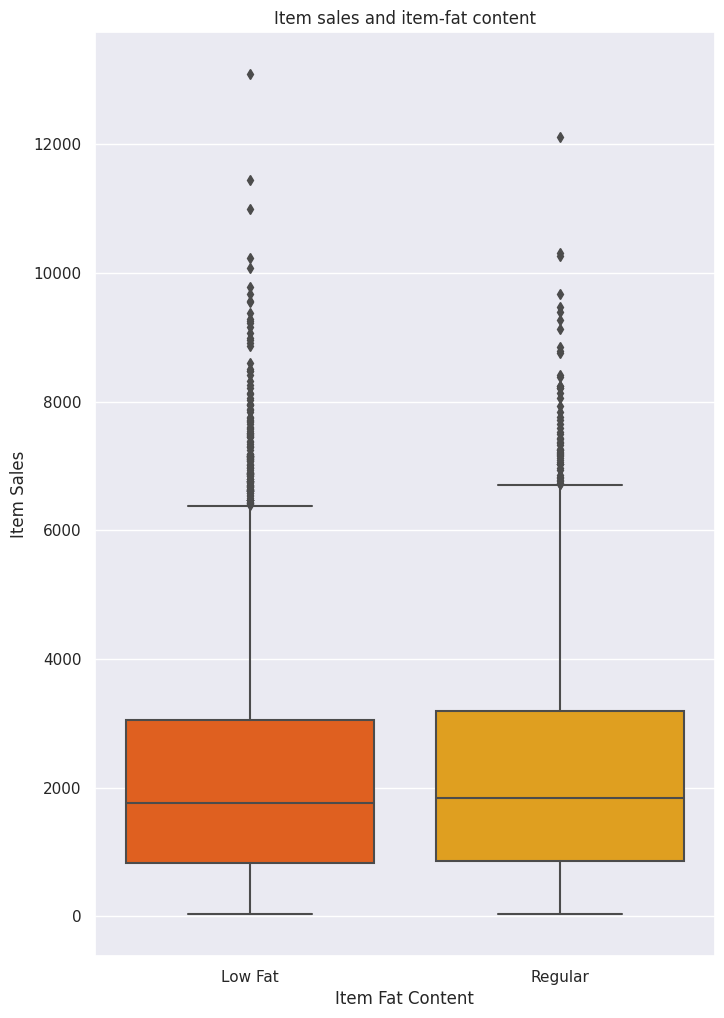

In [ ]:
plt.figure(figsize=(8,12))
sns.boxplot(data=big_mart_data, x='Item_Fat_Content', y='Item_Outlet_Sales', palette='autumn')
plt.xlabel("Item Fat Content")
plt.ylabel("Item Sales")
plt.title("Item sales and item-fat content")
plt.show()

DATA PREPROCESSING

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label encoding

In [ ]:
encoder=LabelEncoder()

In [ ]:
for i in range(len(big_mart_data)):
    if big_mart_data.at[i, 'Outlet_Location_Type'] == 'Tier 1':
        big_mart_data.at[i, 'Outlet_Location_Type'] = 2
    elif big_mart_data.at[i, 'Outlet_Location_Type'] == 'Tier 2':
        big_mart_data.at[i, 'Outlet_Location_Type'] = 1
    elif big_mart_data.at[i, 'Outlet_Location_Type'] == 'Tier 3':
        big_mart_data.at[i, 'Outlet_Location_Type'] = 0
    else:
        print(f"Warning: unknown location type '{big_mart_data.at[i, 'Outlet_Location_Type']}' found in row {i}.")

# Print the first few rows of the DataFrame to verify the encoding
print(big_mart_data.head())

  Item_Identifier Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.3          Low Fat         0.016047   
1           DRC01        5.92          Regular         0.019278   
2           FDN15        17.5          Low Fat         0.016760   
3           FDX07        19.2          Regular         0.000000   
4           NCD19        8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  \
0                       1999   
1                       2009   
2                       1999   
3                       1998   
4                       1987   

                                         Outlet_Size Outlet_Locatio

In [ ]:
#big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])

#big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])



In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,0,0.016047,4,249.8092,9,1999,Medium,2,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,Medium,0,2,443.4228
2,FDN15,17.5,0,0.016760,10,141.6180,9,1999,Medium,2,1,2097.2700
3,FDX07,19.2,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,0,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,High,0,1,994.7052


In [ ]:
#Z=big_mart_data.drop(columns='Item_Identifier',axis=1)

X=big_mart_data.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
display(X)
Y=big_mart_data['Item_Outlet_Sales']

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.3,0,0.016047,4,249.8092,1999,Medium,2,1
1,5.92,1,0.019278,14,48.2692,2009,Medium,0,2
2,17.5,0,0.016760,10,141.6180,1999,Medium,2,1
3,19.2,1,0.000000,6,182.0950,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,0,0
4,8.93,0,0.000000,9,53.8614,1987,High,0,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,High,0,1
8519,8.38,1,0.046982,0,108.1570,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1
8520,10.6,0,0.035186,8,85.1224,2004,Small,1,1
8521,7.21,1,0.145221,13,103.1332,2009,Medium,0,2


In [ ]:
print(X)

     Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0            9.3                 0         0.016047          4  249.8092   
1           5.92                 1         0.019278         14   48.2692   
2           17.5                 0         0.016760         10  141.6180   
3           19.2                 1         0.000000          6  182.0950   
4           8.93                 0         0.000000          9   53.8614   
...          ...               ...              ...        ...       ...   
8518       6.865                 0         0.056783         13  214.5218   
8519        8.38                 1         0.046982          0  108.1570   
8520        10.6                 0         0.035186          8   85.1224   
8521        7.21                 1         0.145221         13  103.1332   
8522        14.8                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  \
0                          1999   
1                

Splitting the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


ML Model Training

XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
regressor=XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2, booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [ ]:
regressor.fit(X_train._get_numeric_data(),Y_train._get_numeric_data())

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=2, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

EVALUATION

In [ ]:
training_data_prediction=regressor.predict(X_train._get_numeric_data())

R-Squared:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [ ]:
import sklearn.metrics as metrics
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print("R Squared value",r2_train)

R Squared value 0.6137469919805464


In [ ]:
test_data_prediction=regressor.predict(X_test._get_numeric_data())

In [ ]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print("R Squared value")
print(metrics.r2_score(Y_test,test_data_prediction))
print("MAE")
print(metrics.mean_absolute_error(Y_test,test_data_prediction))
print("MSE")
print(np.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction)))


R Squared value
0.6119840447957043
MAE
717.4761881996096
MSE
1026.9448629867966


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

In [ ]:
rf.fit(X_train._get_numeric_data(),Y_train._get_numeric_data())


RandomForestRegressor()

In [ ]:
Y_pred_rf= rf.predict(X_test._get_numeric_data())

In [ ]:
print("R squared value")
print(metrics.r2_score(Y_test,Y_pred_rf))
print("MAE")
print(metrics.mean_absolute_error(Y_test,Y_pred_rf))
print("MSE")
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_rf)))

R squared value
0.5622438075151044
MAE
760.1560357442816
MSE
1090.7833092095123


Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 =LinearRegression()
regressor1.fit(X_train._get_numeric_data(),Y_train._get_numeric_data())


In [ ]:
y_pred = regressor1.predict(X_test._get_numeric_data())


In [ ]:
print("R squared error")
print(metrics.r2_score(Y_test,y_pred))
print("MAE")
print(metrics.mean_absolute_error(Y_test,y_pred))
print("MSE")
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

R squared error
0.5033320811290962
MAE
876.2803793952634
MSE
1161.8642504784882
